In [37]:
#Listing 4.3
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words =10000)

import numpy as np
import random

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=30,
                    batch_size=1024,
                    validation_data=(x_val, y_val))

results = model.evaluate(x_test, y_test)

#size = (input size * hidden layers + hidden layers * output size) + (hidden layers + output size)
#size = (16 * 16 + 16 * 1) + (16 + 1)
size = (4 * 4 + 4 * 1) + (4 + 1)
print('Size: ', size)

Epoch 1/30
15/15 [==============================] - 3s 173ms/step - loss: 0.6446 - acc: 0.6961 - val_loss: 0.8290 - val_acc: 0.5883
Epoch 2/30
15/15 [==============================] - 2s 146ms/step - loss: 0.3882 - acc: 0.8395 - val_loss: 0.2979 - val_acc: 0.8791
Epoch 3/30
15/15 [==============================] - 2s 149ms/step - loss: 0.2270 - acc: 0.9104 - val_loss: 0.4744 - val_acc: 0.8098
Epoch 4/30
15/15 [==============================] - 2s 150ms/step - loss: 0.2134 - acc: 0.9157 - val_loss: 0.2653 - val_acc: 0.8888
Epoch 5/30
15/15 [==============================] - 2s 151ms/step - loss: 0.1195 - acc: 0.9547 - val_loss: 0.2674 - val_acc: 0.8894
Epoch 6/30
15/15 [==============================] - 2s 146ms/step - loss: 0.0302 - acc: 0.9946 - val_loss: 0.3739 - val_acc: 0.8826
Epoch 7/30
15/15 [==============================] - 2s 151ms/step - loss: 0.0064 - acc: 0.9991 - val_loss: 0.5148 - val_acc: 0.8734
Epoch 8/30
15/15 [==============================] - 2s 146ms/step - loss: 0.

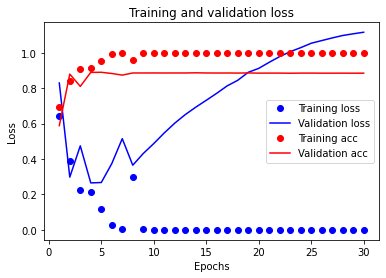

In [38]:
#3.4.4
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.plot(epochs, acc_values, 'ro', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()